# Decision Trees using Sklearn

**Import libraries**

In [67]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

**Import Data**

The data is downloaded from Kaggle at the link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset#cardio_train.csv

In [25]:
cardio = pd.read_csv("/Users/lukabeverin/Documents/GitHub Projects/Decision Trees/cardio_train.csv", delimiter = ";")

View the data set

In [26]:
cardio.head()
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


The age variable seems rather strange but it is the respondents age in **days.**

Now we have to create the **feature** and **target** variables. We want to predict if a persons has presence or absence of cardiovascular disease (Binary, so 1 = present and 0 = not present). The variable "cardio" will be our target variable and the rest will be feature variables. 

In [30]:
# Feature variables 
X = cardio.drop('cardio', axis=1) 

# Target variable
y = cardio['cardio']

Next step is to split our data into training and testing data sets.

In [31]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)   

Here we instantiate the decision tree classifier and set the parameters. All the parameters are detailed at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. We will only go through a few of them. 

1) **Criterion:{“gini”, “entropy”}, default=”gini”:** The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

2) **max_depth: int, default=None:** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 

3) **max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None:** The number of features to consider when looking for the best split

In [62]:
# Instantiate the classifier: clf
clf = DecisionTreeClassifier(max_depth=4, criterion="gini")

In [63]:
# Fit the classifier to the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
#Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

In [65]:
# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.7302857142857143


We could use grid search cv or random search cv to tune our parameters for better results.

### Visualise the Decision Tree

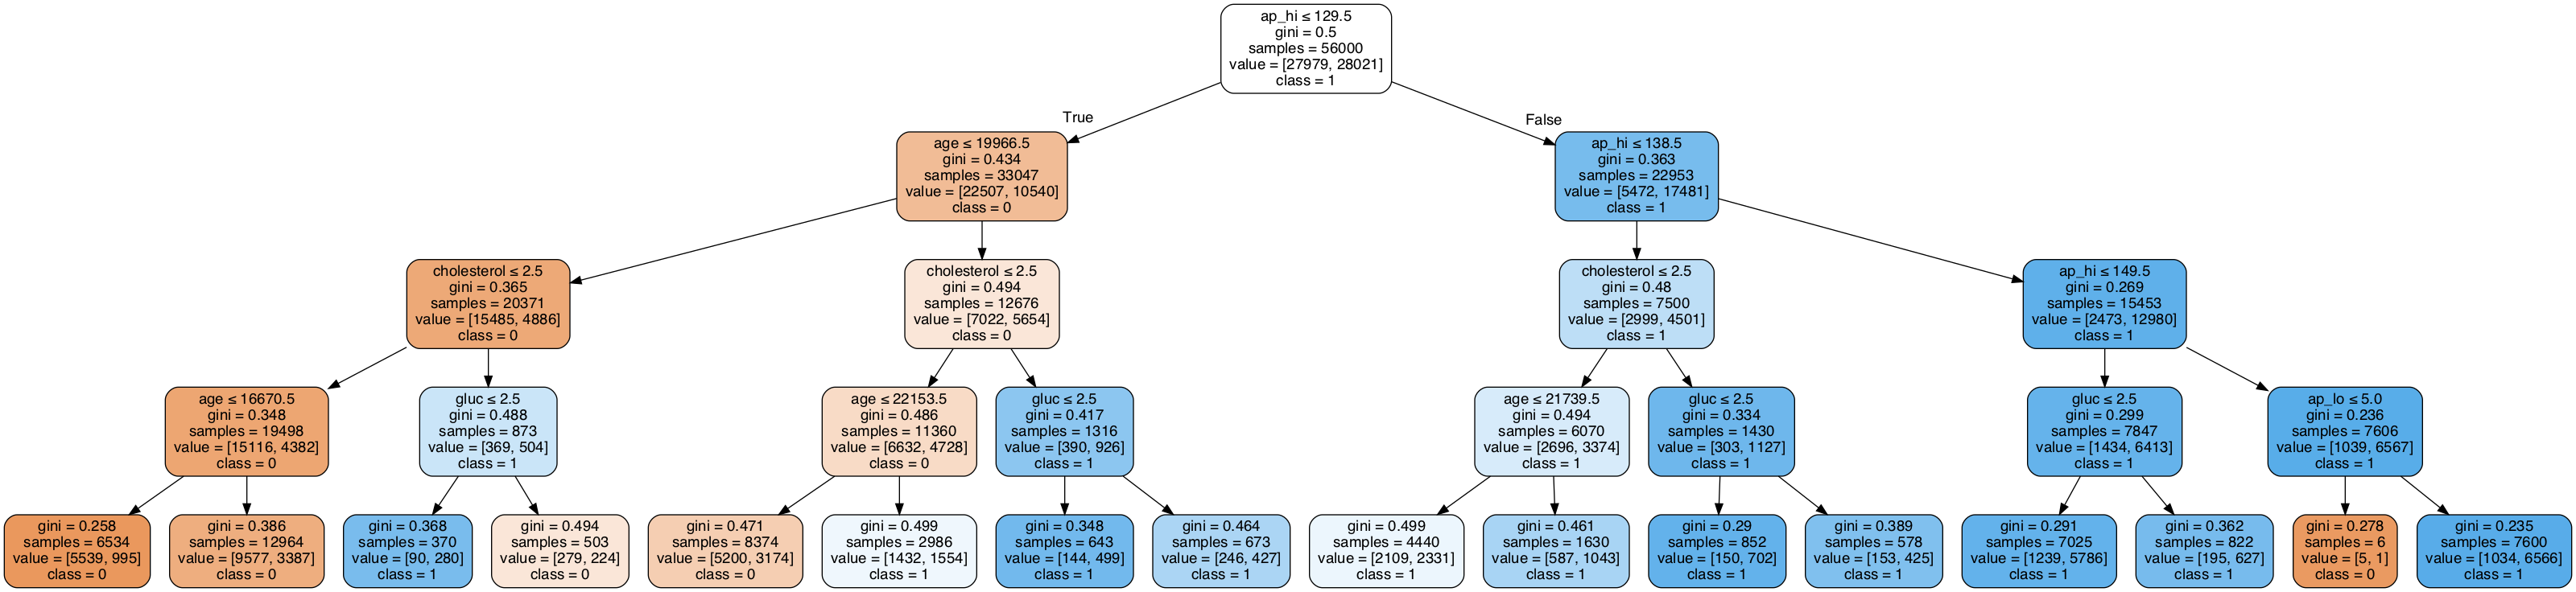

In [72]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cardio.png')
Image(graph.create_png())

Completed by Luka B